# Using DTW to compare sounds 

Using [librosa](https://github.com/bmcfee/librosa/) for instance, you can easily extract the MFCC of sound.

### Compute the MFCCs of two sounds

In [1]:
import librosa

y1, sr1 = librosa.load('../../Downloads/tmp/sounds/10.wav')
y2, sr2 = librosa.load('../../Downloads/tmp/sounds/78.wav')

Populating the interactive namespace from numpy and matplotlib


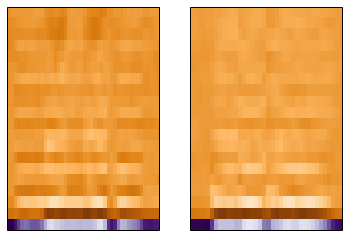

In [2]:
%pylab inline

subplot(1, 2, 1)
mfcc1 = librosa.feature.mfcc(y1, sr1)
librosa.display.specshow(mfcc1)

subplot(1, 2, 2)
mfcc2 = librosa.feature.mfcc(y2, sr2)
librosa.display.specshow(mfcc2)

### Compare them using DTW

In [3]:
from dtw import dtw

In [4]:
from numpy.linalg import norm
dist, cost, acc_cost, path = dtw(mfcc1.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
print 'Normalized distance between the two sounds:', dist

Normalized distance between the two sounds: 192.489808008


(-0.5, 37.5)

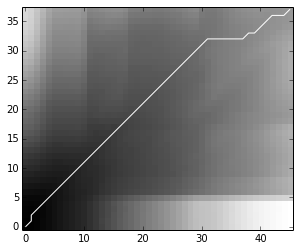

In [5]:
imshow(cost.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')
xlim((-0.5, cost.shape[0]-0.5))
ylim((-0.5, cost.shape[1]-0.5))